In [ ]:
import requests
import matplotlib.pyplot as plt
import time

# 1. ÏÉÅÏúÑ 100Í∞ú ÏΩîÏù∏ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
def get_top_100_coins():
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        "vs_currency": "usd",
        "order": "market_cap_desc",t
        "per_page": 100,
        "page": 1,
        "sparkline": False
    }
    response = requests.get(url, params=params)
    return response.json()

# 2. ÏΩîÏù∏Ïùò ÏãúÍ∞ÄÏ¥ùÏï° Ï∂îÏù¥ Í∞ÄÏ†∏Ïò§Í∏∞ (ÏµúÍ∑º 7Ïùº Í∏∞Ï§Ä, ÌïòÎ£® Îã®ÏúÑ)
def get_market_chart(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {
        "vs_currency": "usd",
        "days": 365,
        "interval": "daily"
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()["market_caps"]
    else:
        return []

# 3. ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_market_caps(coin_data):
    plt.figure(figsize=(16, 10))

    for coin_name, market_caps in coin_data.items():
        if not market_caps:
            continue
        timestamps = [cap[0] for cap in market_caps]
        values = [cap[1] / 1e9 for cap in market_caps]  # Ïñµ Îã®ÏúÑÎ°ú Î≥ÄÌôò (Billion USD)
        label = coin_name if len(values) > 0 else ""
        plt.plot(timestamps, values, label=label)

    plt.title("Top 100 Alt Coins - Market Cap Trend (Last 365 Days)")
    plt.xlabel("Timestamp")
    plt.ylabel("Market Cap (Billion USD)")
    plt.xticks(rotation=45)
    plt.legend(fontsize="small", loc="upper left", ncol=2)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

üöÄ Fetching top 100 coins...
üìà Fetching data for Tether (1/100)
üìà Fetching data for XRP (2/100)
üìà Fetching data for BNB (3/100)
üìà Fetching data for Solana (4/100)
üìà Fetching data for USDC (5/100)
üìà Fetching data for Dogecoin (6/100)
üìà Fetching data for Cardano (7/100)
üìà Fetching data for TRON (8/100)
üìà Fetching data for Lido Staked Ether (9/100)
üìà Fetching data for Wrapped Bitcoin (10/100)
üìà Fetching data for LEO Token (11/100)


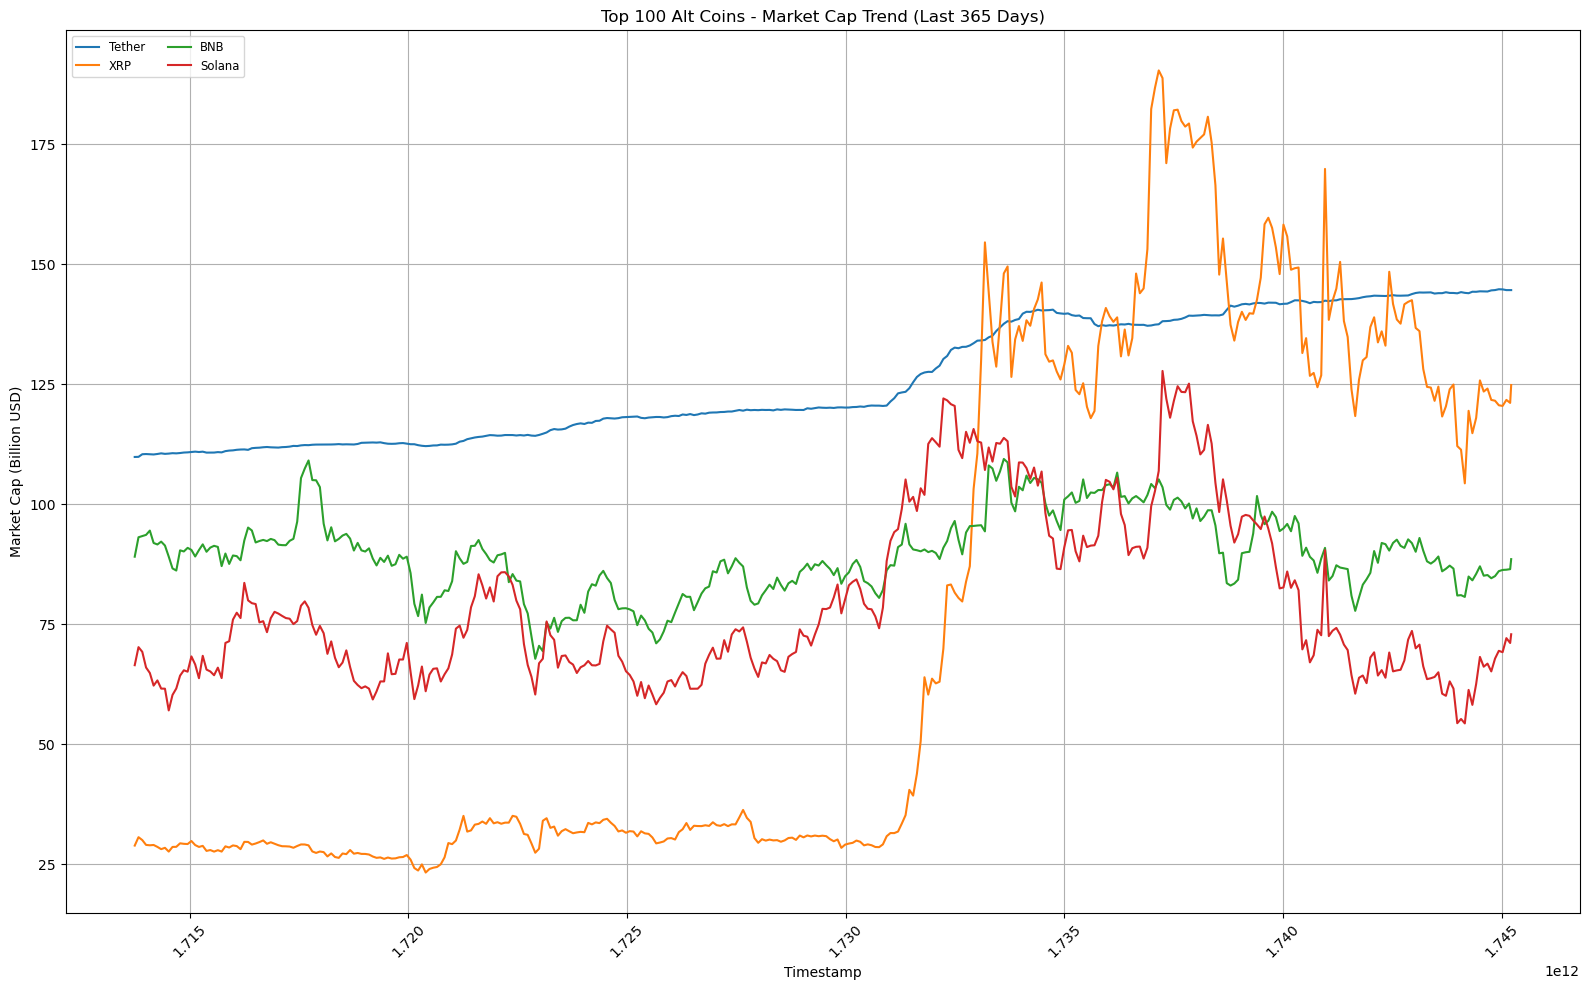

: 

In [ ]:
print("üöÄ Fetching top 100 coins...")
coins = get_top_100_coins()
coins = coins[2:] # ÎπÑÌä∏ÏΩîÏù∏, Ïù¥ÎçîÎ¶¨ÏõÄ Ï†úÏô∏
coin_market_data = {}

for i, coin in enumerate(coins):
    coin_id = coin["id"]
    coin_name = coin["name"]
    print(f"üìà Fetching data for {coin_name} ({i+1}/100)")
    market_caps = get_market_chart(coin_id)
    coin_market_data[coin_name] = market_caps
    time.sleep(1.2)  # CoinGecko Î¨¥Î£å API ÏöîÏ≤≠ Ï†úÌïú Ïö∞Ìöå

    if i >= 10:  # ÎÑàÎ¨¥ ÎßéÏúºÎ©¥ Ïò§Îûò Í±∏Î¶¨ÎãàÍπå ÏòàÏ†úÎ°ú 10Í∞úÎßå!
        break

plot_market_caps(coin_market_data)